In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [140]:
df = pd.read_csv('epi/epi_r.csv')
df.head(1)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.5,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [141]:
# remove extreme values
def rm_outliers(data, m=3):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
df['calories_clean'] = rm_outliers(df['calories'])
df['calories_clean'].describe()

count    15927.000000
mean       504.490488
std        890.932819
min          0.000000
25%        198.000000
50%        331.000000
75%        586.000000
max      54512.000000
Name: calories_clean, dtype: float64

In [142]:
df['calories_clean'] = rm_outliers(df['calories_clean'])
df['calories_clean'].describe()

count    15773.000000
mean       447.505864
std        397.424089
min          0.000000
25%        196.000000
50%        327.000000
75%        574.000000
max       3177.000000
Name: calories_clean, dtype: float64

In [143]:
df['fat_clean'] = rm_outliers(df['fat'])
df['fat_clean'].describe()

count    15862.000000
mean        31.641092
std        355.422568
min          0.000000
25%          7.000000
50%         17.000000
75%         33.000000
max      44198.000000
Name: fat_clean, dtype: float64

In [144]:
df['fat_clean'] = rm_outliers(df['fat_clean'])
df['fat_clean'].describe()

count    15855.000000
mean        28.206496
std         46.437382
min          0.000000
25%          7.000000
50%         17.000000
75%         33.000000
max       1054.000000
Name: fat_clean, dtype: float64

In [145]:
df['protein_clean'] = rm_outliers(df['protein'])
df['protein_clean'].describe()

count    15882.000000
mean        21.853797
std         49.156532
min          0.000000
25%          3.000000
50%          8.000000
75%         27.000000
max       2074.000000
Name: protein_clean, dtype: float64

In [146]:
df['protein_clean'] = rm_outliers(df['protein_clean'])
df['protein_clean'].describe()

count    15722.000000
mean        18.502417
std         24.502796
min          0.000000
25%          3.000000
50%          8.000000
75%         26.000000
max        167.000000
Name: protein_clean, dtype: float64

In [147]:
df['sodium_clean'] = rm_outliers(df['sodium'])
df['sodium_clean'].describe()

count     15925.000000
mean        705.617457
std        2980.223711
min           0.000000
25%          80.000000
50%         294.000000
75%         709.000000
max      132220.000000
Name: sodium_clean, dtype: float64

In [148]:
df['sodium_clean'] = rm_outliers(df['sodium_clean'])
df['sodium_clean'].describe()

count    15835.000000
mean       550.536470
std        806.183336
min          0.000000
25%         79.000000
50%        291.000000
75%        697.500000
max       9573.000000
Name: sodium_clean, dtype: float64

In [149]:
df.head(1)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,zucchini,cookbooks,leftovers,snack,snack week,turkey,calories_clean,fat_clean,protein_clean,sodium_clean
0,"Lentil, Apple, and Turkey Wrap",2.5,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,426.0,7.0,30.0,559.0


In [150]:
df2 = pd.DataFrame({'title':df.title, 'rating':df.rating, 'calories':df.calories_clean, 'fat':df.fat_clean, 
                    'sodium':df.sodium_clean, 'protein':df.protein_clean, 'healthy':df.healthy})
df2.head(1)

,calories,fat,healthy,protein,rating,sodium,title
0,426.0,7.0,0.0,30.0,2.5,559.0,"Lentil, Apple, and Turkey Wrap"


In [176]:
df3 = df2.dropna()

In [180]:
df_h = df3[df3.healthy == 1]
df_h.describe()

,calories,fat,healthy,protein,rating,sodium
count,1253.000000,1253.000000,1253.0,1253.000000,1253.000000,1253.000000
mean,333.428571,18.014366,1.0,15.876297,3.820331,523.513168
std,281.388162,20.515827,0.0,19.654033,1.242381,796.936616
min,1.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,148.000000,6.000000,1.0,3.000000,3.750000,73.000000
50%,265.000000,13.000000,1.0,8.000000,4.375000,262.000000
75%,435.000000,23.000000,1.0,23.000000,4.375000,647.000000
max,2589.000000,239.000000,1.0,159.000000,5.000000,9465.000000


In [181]:
df_n = df3[df3.healthy == 0]
df_n.describe()

,calories,fat,healthy,protein,rating,sodium
count,14298.000000,14298.000000,14298.0,14298.000000,14298.000000,14298.000000
mean,447.892083,25.434676,0.0,18.286404,3.752972,524.148762
std,383.768730,28.643383,0.0,24.127326,1.288061,732.763205
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,202.000000,8.000000,0.0,3.000000,3.750000,79.000000
50%,334.000000,18.000000,0.0,8.000000,4.375000,287.000000
75%,581.000000,33.000000,0.0,25.000000,4.375000,684.000000
max,3177.000000,342.000000,0.0,167.000000,5.000000,9478.000000


(array([  7.84814515e-04,   1.14475048e-03,   1.63677305e-03,
          2.10017685e-03,   1.85581665e-03,   1.26362842e-03,
          1.07980791e-03,   1.04788698e-03,   7.96922453e-04,
          6.89051734e-04,   5.47058645e-04,   4.78813905e-04,
          3.70943186e-04,   3.28015043e-04,   2.52065251e-04,
          2.13539994e-04,   1.55201748e-04,   1.37590202e-04,
          1.21079378e-04,   9.02591728e-05,   7.37483485e-05,
          6.82447404e-05,   8.80577296e-05,   4.51295864e-05,
          4.62303080e-05,   3.30216486e-05,   3.74245351e-05,
          2.53165973e-05,   3.30216486e-05,   1.87122675e-05,
          2.20144324e-05,   1.43093811e-05,   1.65108243e-05,
          1.32086594e-05,   1.32086594e-05,   8.80577296e-06,
          1.43093811e-05,   3.30216486e-06,   1.32086594e-05,
          9.90649458e-06,   4.40288648e-06,   7.70505134e-06,
          4.40288648e-06,   6.60432972e-06,   6.60432972e-06,
          1.10072162e-06,   6.60432972e-06,   4.40288648e-06,
        

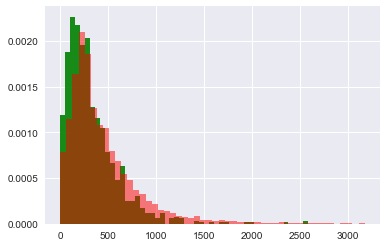

In [194]:
plt.hist(df_h.calories, bins=50, normed=True, color='green', alpha=.9)
plt.hist(df_n.calories, bins=50, normed=True, color='red', alpha=.5)

(array([  3.28328748e-02,   2.51538063e-02,   2.47754767e-02,
          1.73009107e-02,   1.16770922e-02,   8.29257599e-03,
          5.34774012e-03,   4.63198141e-03,   3.66059458e-03,
          2.36200376e-03,   2.34155352e-03,   1.59511943e-03,
          8.48685335e-04,   9.81611954e-04,   7.87334588e-04,
          5.93057222e-04,   5.01031102e-04,   3.06753736e-04,
          2.04502490e-04,   3.47654234e-04,   1.94277366e-04,
          1.53376868e-04,   2.45402989e-04,   1.84052241e-04,
          1.22701494e-04,   7.15758717e-05,   1.12476370e-04,
          5.11256226e-05,   8.18009962e-05,   7.15758717e-05,
          3.06753736e-05,   5.11256226e-05,   2.04502490e-05,
          8.18009962e-05,   5.11256226e-05,   4.09004981e-05,
          2.04502490e-05,   1.02251245e-05,   0.00000000e+00,
          2.04502490e-05,   1.02251245e-05,   1.02251245e-05,
          0.00000000e+00,   0.00000000e+00,   1.02251245e-05,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

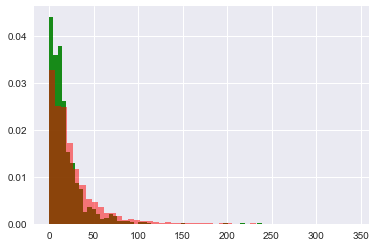

In [193]:
plt.hist(df_h.fat, bins=50, normed=True, color='green', alpha=.9)
plt.hist(df_n.fat, bins=50, normed=True, color='red', alpha=.5)

(array([  2.12114480e-03,   9.36786683e-04,   6.08044290e-04,
          4.32050888e-04,   3.08449652e-04,   2.16947841e-04,
          1.66031511e-04,   1.11425592e-04,   8.15399200e-05,
          5.49748782e-05,   4.57509053e-05,   3.17304666e-05,
          2.98856720e-05,   1.99237814e-05,   1.88169046e-05,
          1.84479457e-05,   9.59293176e-06,   3.32063023e-06,
          7.74813719e-06,   8.85501393e-06,   4.42750697e-06,
          5.90334262e-06,   2.95167131e-06,   1.10687674e-06,
          5.16542480e-06,   2.95167131e-06,   1.84479457e-06,
          3.32063023e-06,   1.47583566e-06,   7.37917828e-07,
          2.58271240e-06,   2.95167131e-06,   2.21375348e-06,
          7.37917828e-07,   3.68958914e-07,   0.00000000e+00,
          3.68958914e-07,   0.00000000e+00,   7.37917828e-07,
          0.00000000e+00,   1.10687674e-06,   3.68958914e-07,
          7.37917828e-07,   7.37917828e-07,   3.68958914e-07,
          0.00000000e+00,   3.68958914e-07,   0.00000000e+00,
        

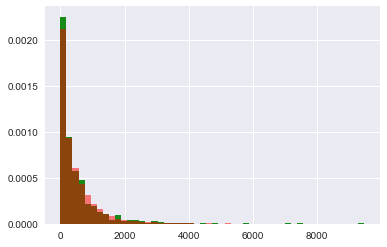

In [192]:
plt.hist(df_h.sodium, bins=50, normed=True, color='green', alpha=.9)
plt.hist(df_n.sodium, bins=50, normed=True, color='red', alpha=.5)

(array([  8.52470468e-02,   4.90207164e-02,   3.73989746e-02,
          1.55794161e-02,   1.09935396e-02,   1.33388280e-02,
          8.04098894e-03,   7.14056570e-03,   9.19269309e-03,
          6.36578291e-03,   6.72176419e-03,   7.34996645e-03,
          5.42347952e-03,   4.31365553e-03,   5.21407877e-03,
          2.65938957e-03,   3.26665176e-03,   2.99443078e-03,
          1.50768543e-03,   1.59144573e-03,   2.36622852e-03,
          1.08888392e-03,   1.61238580e-03,   1.34016482e-03,
          1.27734460e-03,   8.16662939e-04,   1.00512362e-03,
          5.86322110e-04,   4.18801507e-04,   9.00423241e-04,
          3.97861432e-04,   5.65382035e-04,   3.97861432e-04,
          2.93161055e-04,   2.09400754e-04,   3.14101131e-04,
          2.09400754e-04,   1.88460678e-04,   1.67520603e-04,
          3.76921357e-04,   1.67520603e-04,   2.51280904e-04,
          8.37603015e-05,   8.37603015e-05,   1.67520603e-04,
          1.88460678e-04,   1.67520603e-04,   8.37603015e-05,
        

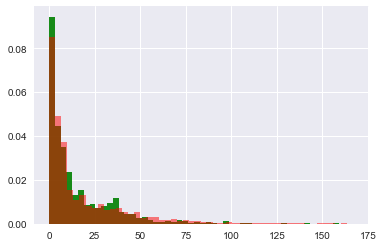

In [196]:
plt.hist(df_h.protein, bins=50, normed=True, color='green', alpha=.9)
plt.hist(df_n.protein, bins=50, normed=True, color='red', alpha=.5)

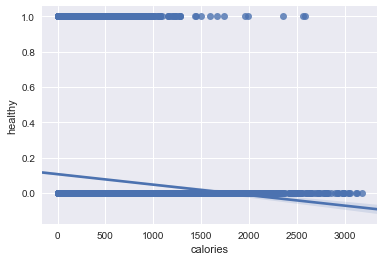

In [197]:
sns.regplot('calories','healthy', data = df3)

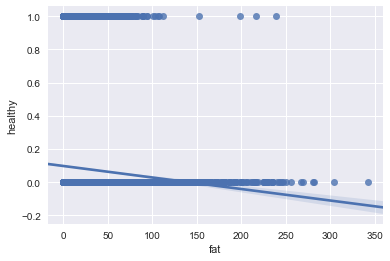

In [198]:
sns.regplot('fat','healthy', data = df3)

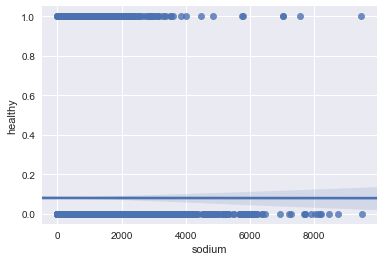

In [199]:
sns.regplot('sodium','healthy', data = df3)

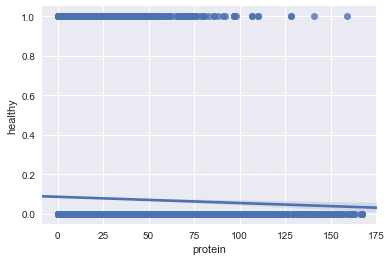

In [200]:
sns.regplot('protein','healthy', data = df3)

In [211]:
df[0:1].to_string()

"                             title  rating  calories  protein  fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  30 days of groceries  advance prep required  alabama  alaska  alcoholic  almond  amaretto  anchovy  anise  anniversary  anthony bourdain  aperitif  appetizer  apple  apple juice  apricot  arizona  artichoke  arugula  asian pear  asparagus  aspen  atlanta  australia  avocado  back to school  backyard bbq  bacon  bake  banana  barley  basil  bass  bastille day  bean  beef  beef rib  beef shank  beef tenderloin  beer  beet  bell pepper  berry  beverly hills  birthday  biscuit  bitters  blackberry  blender  blue cheese  blueberry  boil  bok choy  bon appétit  bon app��tit  boston  bourbon  braise  bran  brandy  bread  breadcrumbs  breakfast  brie  brine  brisket  broccoli  broccoli rabe  broil  brooklyn  brown rice  brownie  brunch  brussel sprout  buffalo  buffet  bulgaria  bulgur  burrito  butter  buttermilk  butternut squash  butterscotch/caramel  ca

In [220]:
data = df.iloc[:,6:-4]
data = data.drop('healthy',1)

In [221]:
data

,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
